# Book Recommendation using Content Based Recommendation


## Importing Libraries


In [55]:
import pandas as pd

## Getting Data


In [56]:
books = pd.read_csv('../data/books.csv')

## Exploratory Data Analysis


In [57]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [58]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [59]:
books.dtypes

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object

In [60]:
books.describe

<bound method NDFrame.describe of              isbn13      isbn10                      title  \
0     9780002005883  0002005883                     Gilead   
1     9780002261982  0002261987               Spider's Web   
2     9780006163831  0006163831               The One Tree   
3     9780006178736  0006178731             Rage of angels   
4     9780006280897  0006280897             The Four Loves   
...             ...         ...                        ...   
6805  9788185300535  8185300534                  I Am that   
6806  9788185944609  8185944601       Secrets Of The Heart   
6807  9788445074879  8445074873             Fahrenheit 451   
6808  9789027712059  9027712050   The Berlin Phenomenology   
6809  9789042003408  9042003405  'I'm Telling You Stories'   

                                            subtitle  \
0                                                NaN   
1                                            A Novel   
2                                                NaN 

In [61]:
books.isna().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [62]:
# filling null values based on dtype
books = books.apply(lambda col: col.fillna(0) if col.dtype == 'float64' else col.fillna(''))

In [63]:
books.isna().sum()

isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64

In [64]:
print(books.duplicated().sum())

0


In [65]:
books['categories'].value_counts()[0:10]

categories
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
Philosophy                    160
Comics & Graphic Novels       159
Religion                      137
Drama                         132
Juvenile Nonfiction           116
Name: count, dtype: int64

<Axes: ylabel='categories'>

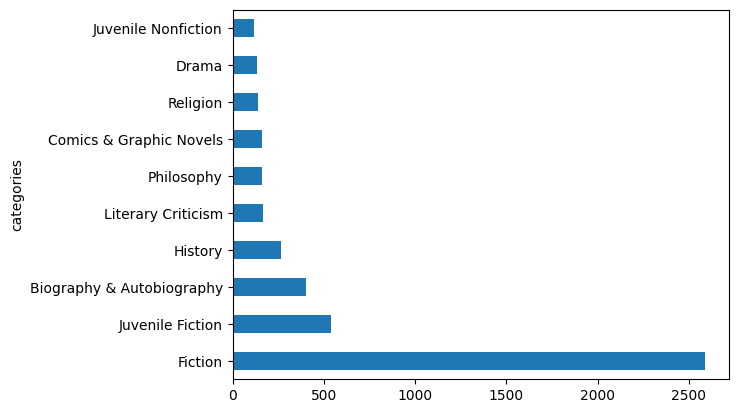

In [66]:
books['categories'].value_counts()[0:10].plot(kind='barh')

## Data Preprocessing


In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
stop_words = set(stopwords.words('english'))

In [70]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # returning as string because vectorizers expect string
    return ' '.join(filtered_tokens)

In [71]:
books['description']

0       A NOVEL THAT READERS and critics have been eag...
1       A new 'Christie for Christmas' -- a full-lengt...
2       Volume Two of Stephen Donaldson's acclaimed se...
3       A memorable, mesmerizing heroine Jennifer -- b...
4       Lewis' work on the nature of love divides love...
                              ...                        
6805    This collection of the timeless teachings of o...
6806                                                     
6807                                                     
6808    Since the three volume edition ofHegel's Philo...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 6810, dtype: object

In [72]:
new_description_col = books['description'].apply(preprocess)

In [73]:
new_description_col

0       novel readers critics eagerly anticipating dec...
1       new 'christie christmas ' -- full-length novel...
2       volume two stephen donaldson 's acclaimed seco...
3       memorable , mesmerizing heroine jennifer -- br...
4       lewis ' work nature love divides love four cat...
                              ...                        
6805    collection timeless teachings one greatest sag...
6806                                                     
6807                                                     
6808    since three volume edition ofhegel 's philosop...
6809    jubilant rewarding collection winterson schola...
Name: description, Length: 6810, dtype: object

In [74]:
books['description'] = new_description_col

In [75]:
books['description']

0       novel readers critics eagerly anticipating dec...
1       new 'christie christmas ' -- full-length novel...
2       volume two stephen donaldson 's acclaimed seco...
3       memorable , mesmerizing heroine jennifer -- br...
4       lewis ' work nature love divides love four cat...
                              ...                        
6805    collection timeless teachings one greatest sag...
6806                                                     
6807                                                     
6808    since three volume edition ofhegel 's philosop...
6809    jubilant rewarding collection winterson schola...
Name: description, Length: 6810, dtype: object

## Vectorization


## With Bag of Words (BoW)


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words='english')

In [77]:
#help(CountVectorizer)

In [78]:
# CountVectorizer.__doc__

In [79]:
cv_matrix = cv.fit_transform(books['description'])

In [80]:
cv_matrix.shape

(6810, 10000)

In [81]:
type(cv_matrix)

scipy.sparse._csr.csr_matrix

In [82]:
cv_matrix.dtype

dtype('int64')

### Cosine Similarity


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
cosine_sim_with_cv = cosine_similarity(cv_matrix)

In [85]:
cosine_sim_with_cv

array([[1.        , 0.00717995, 0.        , ..., 0.        , 0.00749363,
        0.        ],
       [0.00717995, 1.        , 0.03017858, ..., 0.        , 0.00855482,
        0.03017858],
       [0.        , 0.03017858, 1.        , ..., 0.        , 0.03149704,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00749363, 0.00855482, 0.03149704, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03017858, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [86]:
type(cosine_sim_with_cv)

numpy.ndarray

In [87]:
cosine_sim_with_cv.dtype

dtype('float64')

In [88]:
cosine_sim_with_cv.shape

(6810, 6810)

### Recommend Books


In [89]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,novel readers critics eagerly anticipating dec...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,new 'christie christmas ' -- full-length novel...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,volume two stephen donaldson 's acclaimed seco...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"memorable , mesmerizing heroine jennifer -- br...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,lewis ' work nature love divides love four cat...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,collection timeless teachings one greatest sag...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,,Ray Bradbury,Book burning,,,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,since three volume edition ofhegel 's philosop...,1981.0,0.00,210.0,0.0


In [90]:
books['title'] = books['title'].str.lower()

In [91]:
def recommend_book(title, cosine_sim):
    title = ' '.join(title.split()).lower()
    if books[books['title'] == title].empty:
        return "Haven't heard of that one! Sorry can't give any recommendations."
    index = books[books['title'] == title].index[0]

    distances = sorted(enumerate(cosine_sim[index]), reverse=True, key=lambda x: x[1])

    recommended_books = []
    for i, _ in distances[1:6]:
        book = books.iloc[i]
        recommended_books.append(book['title'])
    
    return recommended_books

In [92]:
recommend_book('harry potter', cosine_sim_with_cv)

['the harry potter collection',
 'harry potter and the prisoner of azkaban (book 3)',
 'harry potter and the chamber of secrets (book 2)',
 'harry potter and the order of the phoenix (book 5)',
 'harry potter and the chamber of secrets']

In [93]:
recommend_book('Harry        Potter', cosine_sim_with_cv)

['the harry potter collection',
 'harry potter and the prisoner of azkaban (book 3)',
 'harry potter and the chamber of secrets (book 2)',
 'harry potter and the order of the phoenix (book 5)',
 'harry potter and the chamber of secrets']

In [94]:
recommend_book('HarryPotter', cosine_sim_with_cv)

"Haven't heard of that one! Sorry can't give any recommendations."

## With TF-IDF


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['description'])

In [97]:
tfidf_matrix.shape

(6810, 30319)

In [98]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

In [99]:
tfidf_matrix.dtype

dtype('float64')

In [100]:
tfidf_matrix_dense = tfidf_matrix.toarray()

In [101]:
tfidf_matrix_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
type(tfidf_matrix_dense)

numpy.ndarray

In [103]:
tfidf_matrix_dense.dtype

dtype('float64')

### Cosine Similarity


In [104]:
cosine_sim_with_tfidf = cosine_similarity(tfidf_matrix)

### Recommend Books


In [105]:
recommend_book('Madonna in a fur coat', cosine_sim_with_tfidf)

"Haven't heard of that one! Sorry can't give any recommendations."

## Saving data to backend folder


In [106]:
import numpy as np
import os
import pickle
from scipy.sparse import save_npz

backend_folder_path = os.path.join('..', 'backend')

# save books dataframe
books.to_pickle(os.path.join(backend_folder_path, "books.pkl"))

# save tf-idf objects, which are generally effective for content based recommendations
np.save(os.path.join(backend_folder_path, "similarities.npy"), cosine_sim_with_tfidf)

with open(os.path.join(backend_folder_path, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(tfidf, f)

# save tf-idf sparse matrix with scipy (np.save would require dense numpy conversion which is especially inefficient for larger datasets)
save_npz(os.path.join(backend_folder_path, "tfidf_matrix.npz"), tfidf_matrix)